<a href="https://colab.research.google.com/github/rubencg195/Pytorch-Tutorials/blob/master/Confusion_Matrix_K_Fold_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

![](https://i.ibb.co/mHs6MyP/image.png)


![](https://i.ibb.co/D4YQZPj/image.png)
![](https://i.ibb.co/8xY9WYx/image.png)
![](https://i.ibb.co/CV5KPpQ/image.png)
![](https://i.ibb.co/Yb2R8DC/image.png)
![](https://i.ibb.co/vd1Xgv8/image.png)

In [0]:
from google.colab import files
import os  

def upload(filename):

  if not (os.path.isfile(filename)):
    uploaded = files.upload()

    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
  else:
    print(filename+" on drive")

In [0]:
task_1_filename = "A2_t1_dataset.tsv"
upload(task_1_filename)

A2_t1_dataset.tsv on drive


In [0]:
import pandas as pd
from IPython.core.display import HTML

def readMatrix(filename ):
  cols = pd.read_csv(filename, nrows=1, sep='\t').columns
  data_df = pd.read_csv(
      filename,sep='\t', 
      usecols=cols[1:])
  data = data_df.as_matrix()
  display(HTML(data_df.head().to_html()))
#   print("\n", data)
  return data_df, data
data_df, data = readMatrix(task_1_filename)

,C1,C2,C3
0,50,20,15
1,25,45,10
2,12,20,60


In [0]:
import numpy as np

def calculatePerformance(conf_matrix):
    
  #calculate TP, FP, FN, FN
  TP = np.diag(conf_matrix)
  FP = np.sum(conf_matrix, axis=1) - TP
  FN = np.sum(conf_matrix, axis=0) - TP
  TN = np.sum(conf_matrix) - (FP + FN + TP)

  #calculate performance
  accuracy = np.sum(np.diag(conf_matrix)/np.sum(conf_matrix))
  precision = np.round((TP / (TP + FP)), 2)
  recall = np.round((TP / (TP + FN)), 2)
  specificity = np.round((TN / (FP + TN)), 2)
  FDR =  np.round((FP / (TP + FP)), 2)

  return accuracy, precision, recall, specificity, FDR

calculatePerformance(data)

(0.6031128404669261,
 array([0.59, 0.56, 0.65]),
 array([0.57, 0.53, 0.71]),
 array([0.79, 0.8 , 0.81]),
 array([0.41, 0.44, 0.35]))

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def plotGraph(X, Y):
  h = .02  # step size in the mesh
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
              edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("3-Class classification (k = %i)"
            % (n_neighbors))
  plt.show()

# Part 2

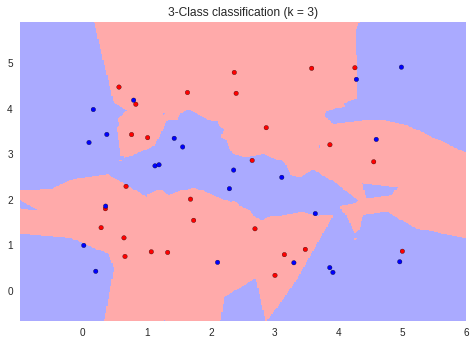

In [0]:
X = np.random.rand(50,2) * 5
y = np.array(np.round(np.random.rand(50)))
n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X, y) 

plotGraph(X, y)

In [0]:
data_df_2 = pd.read_csv(
      task_2_filename,sep='\t', header=None)
data_2 = np.array(data_df_2.as_matrix())
display(HTML(data_df_2.head().to_html()))

print("\nShape: ", data_2.shape, len(data_2) )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347
0,-46.8,-24,1000,-118,0,0,0,0.211864,0.237288,0.262712,0.288136,0.059829,0.059829,0.034188,0.059829,0.025641,0.094017,0.059829,0.051282,0.034188,0.051282,0.076923,0.102564,0.094017,0.034188,0.085470,0.076923,0.025862,0.017241,0.000000,0.017241,0.008621,0.025862,0.008621,0.008621,0.008621,0.000000,0.008621,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.000000,0.017241,0.034483,0.008621,0.051724,0.008621,0.000000,0.000000,0.017241,0.017241,0.008621,0.000000,0.017241,0.017241,0.008621,0.008621,0.008621,0.008621,0.034483,0.008621,0.008621,0.025862,0.000000,0.000000,0.017241,0.017241,0.043103,0.017241,0.017241,0.025862,0.025862,0.008621,0.000000,0.008621,0.008621,0.034483,0.008621,0.000000,0.025862,0.025862,0.025862,0.034483,0.017241,0.025862,0.000000,0.043103,0.025862,0.008696,0.017391,0.000000,0.000000,0.008696,0.008696,0.000000,0.000000,0.000000,0.008696,0.000000,0.000000,0.008696,0.000000,0.000000,0.000000,0.000000,0.000000,0.008696,0.008696,0.000000,0.008696,0.008696,0.000000,0.008696,0.000000,0.008696,0.000000,0.0,0.000000,0.008696,0.000000,0.000000,0.000000,0.000000,0.000000,0.008696,0.008696,0.000000,0.000000,0.008696,0.000000,0.000000,0.000000,0.008696,0.000000,0.000000,0.000000,0.017391,0.000000,0.000000,0.000000,0.017391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008696,0.000000,0.017391,0.008696,0.000000,0.000000,0.000000,0.000000,0.008696,0.017391,0.000000,0.000000,0.008696,0.008696,0.008696,0.008696,0.017391,0.000000,0.008696,0.000000,0.008696,0.000000,0.000000,0.000000,0.008696,0.008696,0.008696,0.000000,0.0,0.017391,0.000000,0.0,0.000000,0.017391,0.008696,0.000000,0.000000,0.000000,0.008696,0.026087,0.008696,0.008696,0.000000,0.000000,0.017391,0.008696,0.008696,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.008696,0.008696,0.008696,0.000000,0.000000,0.000000,0.000000,0.008696,0.008696,0.000000,0.000000,0.000000,0.008696,0.000000,0.000000,0.008696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008696,0.000000,0.017391,0.017391,0.0,0.008696,0.0,0.000000,0.017391,0.000000,0.034783,0.008696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008696,0.000000,0.000000,0.000000,0.008696,0.017391,0.000000,0.000000,0.000000,0.008696,0.008696,0.0,0.017391,0.008696,0.0,0.000000,0.000000,0.000000,0.008696,0.017391,0.000000,0.000000,0.000000,0.000000,0.008696,0.000000,0.008696,0.000000,0.000000,0.008696,0.000000,0.000000,0.000000,0.008696,0.008696,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.008696,0.008696,0.000000,0.000000,0.026087,0.000000,0.008696,0.000000,0.000000,0.000000,0.008696,0.000000,0.000000,0.0,0.00


Shape:  (3817, 348) 3817


In [0]:
task_2_filename = "A2_t2_dataset.tsv"
upload(task_2_filename)

A2_t2_dataset.tsv on drive


In [0]:
from sklearn.metrics import explained_variance_score
#Order by Variance

features_without_label = data_2[: , :-1]
labels = data_2[: , -1]
print("features_without_label {} and labels {}", features_without_label.shape, labels.shape)

variance = np.var(features_without_label,0)

display(HTML(pd.DataFrame([
    variance,
],
index=["Variance"]).to_html()))

print("\nNew Order Based on Features with Higher Variance to lower\n")

display(HTML(pd.DataFrame([
    variance[np.argsort(variance)[::-1]]
], columns=np.argsort(variance)[::-1],
index=["Variance"]).to_html()))


#Filter Low-Variance Features
from sklearn.feature_selection import VarianceThreshold
selector =  VarianceThreshold(0.0001) 
filtered_data = selector.fit_transform(data_2[:,np.argsort(variance)[::-1]])
filtered_data = np.c_[filtered_data, data_2[:,-1]]

print("\nVariance Filtered Data (with Label Col.) {} \n".format(filtered_data.shape))

display(HTML(pd.DataFrame(
    filtered_data
).head().to_html()))


features_without_label {} and labels {} (3817, 347) (3817,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346
Variance,856.600088,154039.339823,124689.607951,229216.067018,0.249989,205151.902203,0.249965,0.004962,0.005135,0.004224,0.004314,0.002102,0.000856,0.000615,0.000557,0.000883,0.002239,0.000757,0.000604,0.000652,0.000579,0.001213,0.001551,0.000706,0.000584,0.001757,0.001259,0.000699,0.000232,0.000183,0.000155,0.000255,0.000253,0.000111,0.00011,0.00021,0.000183,0.000143,0.000161,0.000192,0.000189,0.000213,0.000185,0.000232,0.000249,0.000215,0.00019,0.000215,0.000841,0.000167,0.000171,0.000111,0.000229,0.000219,0.000216,0.000124,0.000203,0.000204,0.000132,0.000215,0.000128,0.000149,0.000202,0.000204,0.000192,0.000183,0.000204,0.000125,0.000165,0.000263,0.000501,0.000153,0.000141,0.000357,0.000355,0.000195,0.000089,0.000219,0.000237,0.000183,0.000202,0.000164,0.000134,0.000251,0.000244,0.000334,0.000343,0.000167,0.000125,0.000511,0.000253,0.000219,0.000064,0.000065,0.000085,0.000058,0.000049,0.000052,0.000037,0.000058,0.00005,0.000046,0.000036,0.000068,0.000049,0.000052,0.000055,0.000049,0.000031,0.000039,0.000033,0.000066,0.000035,0.000063,0.000034,0.000033,0.000051,0.000047,0.000032,0.000023,0.000018,0.000037,0.000034,0.000054,0.00003,0.000035,0.000045,0.000057,0.000048,0.000063,0.000043,0.00004,0.000049,0.00003,0.000032,0.000026,0.000026,0.000022,0.000035,0.000071,0.000029,0.000038,0.000049,0.000066,0.000041,0.00006,0.000042,0.000054,0.000047,0.000054,0.000035,0.000052,0.00004,0.000049,0.000086,0.000063,0.000055,0.000037,0.000047,0.000033,0.000064,0.00004,0.000025,0.000055,0.000097,0.000055,0.000039,0.000032,0.000061,0.000039,0.000052,0.000041,0.000051,0.000078,0.000048,0.000037,0.000061,0.000057,0.00003,0.000055,0.000113,0.000073,0.000043,0.000015,0.000031,0.000051,0.00004,0.000046,0.000051,0.000033,0.000064,0.000058,0.000134,0.000117,0.000063,0.00004,0.000119,0.000056,0.000062,0.000033,0.000049,0.00004,0.000047,0.000027,0.000022,0.000007,0.000027,0.000029,0.000028,0.000032,0.000034,0.000055,0.000067,0.000077,0.000035,0.000033,0.000053,0.000042,0.00007,0.000084,0.000042,0.000061,0.000038,0.000036,0.00004,0.000051,0.000025,0.00003,0.000037,0.000033,0.000019,0.000045,0.000059,0.000071,0.000054,0.000059,0.000037,0.000066,0.000047,0.000074,0.000059,0.000114,0.000044,0.000062,0.000145,0.000102,0.000058,0.000028,0.000034,0.000099,0.000059,0.000054,0.000024,0.000025,0.000044,0.000068,0.000058,0.000139,0.000049,0.00003,0.000064,0.00006,0.000029,0.000037,0.00004,0.000062,0.00005,0.000044,0.000026,0.000028,0.000027,0.000045,0.000025,0.000054,0.000026,0.000042,0.000038,0.000041,0.00003,0.000041,0.000036,0.000057,0.000058,0.000068,0.000037,0.000033,0.000054,0.00003,0.000041,0.000027,0.000025,0.000021,0.000045,0.000017,0.00002,0.000035,0.000048,0.00003,0.000066,0.000048,0.000036,0.0000


New Order Based on Features with Higher Variance to lower



,3,5,1,2,0,4,6,8,7,10,9,16,11,25,22,26,21,15,12,48,17,23,27,19,13,18,24,20,14,89,70,73,74,86,85,346,69,31,90,32,83,44,84,78,43,28,52,77,53,91,54,59,45,47,41,35,63,66,57,56,62,80,75,39,64,46,40,42,36,29,65,79,50,87,49,68,81,38,30,71,61,244,37,72,257,192,82,58,60,88,67,55,196,193,241,180,51,33,34,245,249,164,343,76,154,334,94,219,173,213,324,239,181,345,139,233,218,103,315,283,255,212,318,344,237,143,298,111,93,190,260,160,339,92,113,155,194,129,243,265,198,168,308,221,176,326,320,330,145,261,235,232,250,321,240,282,191,95,246,256,99,127,177,281,331,197,301,302,163,211,165,106,156,179,314,286,234,340,251,123,147,149,273,322,216,170,105,97,342,338,151,185,172,225,188,335,116,316,266,332,309,100,104,107,132,142,200,258,153,96,174,128,299,296,238,117,148,202,158,101,187,313,231,292,126,337,271,336,254,242,307,267,182,130,323,275,305,220,217,146,144,277,288,171,341,279,131,161,264,152,224,186,201,195,169,109,303,166,276,222,319,141,236,157,121,284,98,228,263,310,175,223,300,280,102,112,295,138,214,150,125,312,122,248,328,210,325,114,110,199,215,115,189,159,229,285,209,134,118,167,329,333,108,184,306,317,297,133,278,178,259,227,124,287,304,207,327,140,262,247,269,208,206,270,289,203,268,136,135,274,226,253,290,272,162,252,119,137,204,291,294,311,230,120,293,183,205
Variance,229216.067018,205151.902203,154039.339823,124689.607951,856.600088,0.249989,0.249965,0.005135,0.004962,0.004314,0.004224,0.002239,0.002102,0.001757,0.001551,0.001259,0.001213,0.000883,0.000856,0.000841,0.000757,0.000706,0.000699,0.000652,0.000615,0.000604,0.000584,0.000579,0.000557,0.000511,0.000501,0.000357,0.000355,0.000343,0.000334,0.000299,0.000263,0.000255,0.000253,0.000253,0.000251,0.000249,0.000244,0.000237,0.000232,0.000232,0.000229,0.000219,0.000219,0.000219,0.000216,0.000215,0.000215,0.000215,0.000213,0.00021,0.000204,0.000204,0.000204,0.000203,0.000202,0.000202,0.000195,0.000192,0.000192,0.00019,0.000189,0.000185,0.000183,0.000183,0.000183,0.000183,0.000171,0.000167,0.000167,0.000165,0.000164,0.000161,0.000155,0.000153,0.000149,0.000145,0.000143,0.000141,0.000139,0.000134,0.000134,0.000132,0.000128,0.000125,0.000125,0.000124,0.000119,0.000117,0.000114,0.000113,0.000111,0.000111,0.00011,0.000102,0.000099,0.000097,0.000092,0.000089,0.000086,0.000086,0.000085,0.000084,0.000078,0.000077,0.000075,0.000074,0.000073,0.000072,0.000071,0.000071,0.00007,0.000068,0.000068,0.000068,0.000068,0.000067,0.000067,0.000067,0.000066,0.000066,0.000066,0.000066,0.000065,0.000064,0.000064,0.000064,0.000064,0.000064,0.000063,0.000063,0.000063,0.000063,0.000062,0.000062,0.000062,0.000061,0.000061,0.000061,0.000061,0.000061,0.00006,0.00006,0.00006,0.00006,0.000059,0.000059,0.000059,0.000059,0.000059,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000057,0.000057,0.000057,0.000057,0.000056,0.000056,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000053,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000051,0.000051,0.000051,0.000051,0.000051,0.000051,0.00005,0.00005,0.00005,0.00005,0.00005,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000048,0.000048,0.000048,0.000048,0.000047,0.000047,0.000047,0.000047,0.000047,0.000046,0.000046,0.000046,0.000045,0.000045,0.000045,0.000045,0.000045,0.000044,0.000044,0.000044,0.000044,0.000044,0.000043,0.000043,0.000043,0.000042,0.000042,0.000042,0.000042,0.000042,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.000039,0.000039,0.000039,0.000039,0.000038,0.000038,0.000038,0.000038,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000036,0.000036,0.000036,0.000036,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.000033,0.000033,0.000033,0.000033,0.000033,0.000033,0.000033,0.000033,0.000032,0.000032,0.000032,0.000032,0.000032,0.


Variance Filtered Data (with Label Col.) (3817, 101) 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-118.0,0.0,-24.0,1000.0,-46.8,0.0,0.0,0.237288,0.211864,0.288136,0.262712,0.094017,0.059829,0.085470,0.102564,0.076923,0.076923,0.025641,0.059829,0.051724,0.059829,0.094017,0.025862,0.034188,0.034188,0.051282,0.034188,0.051282,0.059829,0.043103,0.043103,0.025862,0.025862,0.017241,0.034483,0.026087,0.017241,0.008621,0.025862,0.025862,0.025862,0.000000,0.025862,0.008621,0.017241,0.017241,0.017241,0.008621,0.017241,0.008696,0.008621,0.008621,0.017241,0.008621,0.017241,0.008621,0.008621,0.000000,0.017241,0.017241,0.034483,0.008621,0.008621,0.017241,0.008621,0.034483,0.017241,0.017241,0.000000,0.000000,0.025862,0.034483,0.000000,0.025862,0.008621,0.017241,0.000000,0.017241,0.017241,0.017241,0.008621,0.034783,0.008621,0.017241,0.017391,0.008696,0.025862,0.008621,0.008621,0.000000,0.000000,0.000000,0.017391,0.008696,0.000000,0.0,0.000000,0.008621,0.008621,0.008696,1.0
1,-80.0,7.0,-15.0,845.0,-28.5,0.0,0.0,0.239316,0.299145,0.196581,0.264957,0.077586,0.103448,0.077586,0.077586,0.034483,0.068966,0.051724,0.094828,0.017391,0.060345,0.043103,0.017391,0.094828,0.060345,0.051724,0.043103,0.025862,0.034483,0.000000,0.043478,0.034783,0.017391,0.008696,0.026087,0.000000,0.017391,0.043478,0.000000,0.026087,0.008696,0.008696,0.008696,0.017391,0.026087,0.043478,0.043478,0.043478,0.017391,0.000000,0.008696,0.034783,0.034783,0.008696,0.034783,0.026087,0.034783,0.000000,0.008696,0.008696,0.017391,0.026087,0.026087,0.017391,0.008696,0.000000,0.017391,0.000000,0.008696,0.008696,0.008696,0.000000,0.026087,0.000000,0.000000,0.000000,0.008696,0.017391,0.008696,0.017391,0.008696,0.000000,0.008696,0.017391,0.000000,0.000000,0.008696,0.017391,0.000000,0.008696,0.008696,0.000000,0.008772,0.000000,0.000000,0.0,0.017391,0.008696,0.008696,0.008772,1.0
2,-42.0,209.0,-96.0,0.0,-92.1,1.0,1.0,0.173554,0.294766,0.203857,0.327824,0.046961,0.082873,0.069061,0.069061,0.024862,0.096685,0.022099,0.044199,0.019391,0.058011,0.080110,0.027701,0.110497,0.102210,0.044199,0.030387,0.052486,0.066298,0.013850,0.019391,0.011080,0.008310,0.008310,0.016620,0.013889,0.016620,0.002770,0.002770,0.000000,0.047091,0.008310,0.011080,0.008310,0.005540,0.002770,0.002770,0.024931,0.011080,0.005556,0.011080,0.038781,0.016620,0.005540,0.027701,0.033241,0.033241,0.019391,0.016620,0.013850,0.022161,0.011080,0.011080,0.019391,0.016620,0.024931,0.008310,0.008310,0.033241,0.008310,0.008310,0.002770,0.002770,0.019391,0.013850,0.011080,0.013850,0.030471,0.024931,0.019391,0.060942,0.005556,0.052632,0.016620,0.005556,0.002778,0.005540,0.005540,0.008310,0.005540,0.019391,0.008310,0.002778,0.000000,0.005556,0.0,0.002770,0.013850,0.002770,0.002778,1.0
3,-306.0,68.0,-107.0,1000.0,-61.1,0.0,1.0,0.176230,0.327869,0.180328,0.315574,0.049383,0.119342,0.053498,0.045267,0.028807,0.111111,0.032922,0.041152,0.016529,0.045267,0.069959,0.049587,0.102881,0.106996,0.045267,0.028807,0.057613,0.061728,0.012397,0.020661,0.020661,0.012397,0.008264,0.008264,0.012448,0.020661,0.008264,0.004132,0.008264,0.041322,0.012397,0.004132,0.012397,0.016529,0.008264,0.008264,0.012397,0.016529,0.024896,0.008264,0.033058,0.012397,0.000000,0.012397,0.028926,0.024793,0.008264,0.000000,0.008264,0.004132,0.008264,0.020661,0.033058,0.016529,0.020661,0.004132,0.004132,0.020661,0.020661,0.012397,0.004132,0.008264,0.004132,0.016529,0.012397,0.020661,0.016529,0.033058,0.020661,0.057851,0.004149,0.066116,0.024793,0.012448,0.008299,0.004132,0.008264,0.004132,0.008264,0.024793,0.004132,0.004149,0.000000,0.000000,0.0,0.012397,0.008264,0.008264,0.004149,1.0
4,-86.0,281.0,-76.0,0.0,-21.1,1.0,1.0,0.279070,0.267442,0.290698,0.162791,0.094118,0.105882,0.023529,0.082353,0.105882,0.035294,0.082353,0.058824,0.047619,0.058824,0.058824,0.047619,0.023529,0.035294,0.0

In [0]:
from random import randrange #Tener cuidado dividir positivos y negativos por igual

# Divide the dataset D pseudo-randomly into V folds
# Remover features con varianza menor a cierto threshold   https://scikit-learn.org/stable/modules/feature_selection.html
def cross_validation_split(dataset, folds=3):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / folds)
	for i in range(folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [0]:
#Filter Low-Variance Features
# from sklearn.feature_selection import VarianceThreshold
# selector =  VarianceThreshold(0.0005) 
# filtered_data = selector.fit_transform(data_2[:,:-2])
# filtered_data = np.c_[filtered_data, data_2[:,-1]]
# print("Variance Filtered Data (Before Label) {} ".format(filtered_data.shape))


#Separate Positives & Negatives
p_indexes = (filtered_data[:,-1] == 1 )
n_indexes = (filtered_data[:,-1] == 0 )
data_positives = filtered_data[p_indexes , :]
data_negatives = filtered_data[n_indexes,  :]

print("Positives {}\n".format(data_positives.shape) )
display(HTML(pd.DataFrame(data_positives).head().to_html()))

print("\n\nNegatives {}\n".format(data_negatives.shape))
display(HTML(pd.DataFrame(data_negatives).head().to_html()))

Positives (348, 101)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-118.0,0.0,-24.0,1000.0,-46.8,0.0,0.0,0.237288,0.211864,0.288136,0.262712,0.094017,0.059829,0.085470,0.102564,0.076923,0.076923,0.025641,0.059829,0.051724,0.059829,0.094017,0.025862,0.034188,0.034188,0.051282,0.034188,0.051282,0.059829,0.043103,0.043103,0.025862,0.025862,0.017241,0.034483,0.026087,0.017241,0.008621,0.025862,0.025862,0.025862,0.000000,0.025862,0.008621,0.017241,0.017241,0.017241,0.008621,0.017241,0.008696,0.008621,0.008621,0.017241,0.008621,0.017241,0.008621,0.008621,0.000000,0.017241,0.017241,0.034483,0.008621,0.008621,0.017241,0.008621,0.034483,0.017241,0.017241,0.000000,0.000000,0.025862,0.034483,0.000000,0.025862,0.008621,0.017241,0.000000,0.017241,0.017241,0.017241,0.008621,0.034783,0.008621,0.017241,0.017391,0.008696,0.025862,0.008621,0.008621,0.000000,0.000000,0.000000,0.017391,0.008696,0.000000,0.0,0.000000,0.008621,0.008621,0.008696,1.0
1,-80.0,7.0,-15.0,845.0,-28.5,0.0,0.0,0.239316,0.299145,0.196581,0.264957,0.077586,0.103448,0.077586,0.077586,0.034483,0.068966,0.051724,0.094828,0.017391,0.060345,0.043103,0.017391,0.094828,0.060345,0.051724,0.043103,0.025862,0.034483,0.000000,0.043478,0.034783,0.017391,0.008696,0.026087,0.000000,0.017391,0.043478,0.000000,0.026087,0.008696,0.008696,0.008696,0.017391,0.026087,0.043478,0.043478,0.043478,0.017391,0.000000,0.008696,0.034783,0.034783,0.008696,0.034783,0.026087,0.034783,0.000000,0.008696,0.008696,0.017391,0.026087,0.026087,0.017391,0.008696,0.000000,0.017391,0.000000,0.008696,0.008696,0.008696,0.000000,0.026087,0.000000,0.000000,0.000000,0.008696,0.017391,0.008696,0.017391,0.008696,0.000000,0.008696,0.017391,0.000000,0.000000,0.008696,0.017391,0.000000,0.008696,0.008696,0.000000,0.008772,0.000000,0.000000,0.0,0.017391,0.008696,0.008696,0.008772,1.0
2,-42.0,209.0,-96.0,0.0,-92.1,1.0,1.0,0.173554,0.294766,0.203857,0.327824,0.046961,0.082873,0.069061,0.069061,0.024862,0.096685,0.022099,0.044199,0.019391,0.058011,0.080110,0.027701,0.110497,0.102210,0.044199,0.030387,0.052486,0.066298,0.013850,0.019391,0.011080,0.008310,0.008310,0.016620,0.013889,0.016620,0.002770,0.002770,0.000000,0.047091,0.008310,0.011080,0.008310,0.005540,0.002770,0.002770,0.024931,0.011080,0.005556,0.011080,0.038781,0.016620,0.005540,0.027701,0.033241,0.033241,0.019391,0.016620,0.013850,0.022161,0.011080,0.011080,0.019391,0.016620,0.024931,0.008310,0.008310,0.033241,0.008310,0.008310,0.002770,0.002770,0.019391,0.013850,0.011080,0.013850,0.030471,0.024931,0.019391,0.060942,0.005556,0.052632,0.016620,0.005556,0.002778,0.005540,0.005540,0.008310,0.005540,0.019391,0.008310,0.002778,0.000000,0.005556,0.0,0.002770,0.013850,0.002770,0.002778,1.0
3,-306.0,68.0,-107.0,1000.0,-61.1,0.0,1.0,0.176230,0.327869,0.180328,0.315574,0.049383,0.119342,0.053498,0.045267,0.028807,0.111111,0.032922,0.041152,0.016529,0.045267,0.069959,0.049587,0.102881,0.106996,0.045267,0.028807,0.057613,0.061728,0.012397,0.020661,0.020661,0.012397,0.008264,0.008264,0.012448,0.020661,0.008264,0.004132,0.008264,0.041322,0.012397,0.004132,0.012397,0.016529,0.008264,0.008264,0.012397,0.016529,0.024896,0.008264,0.033058,0.012397,0.000000,0.012397,0.028926,0.024793,0.008264,0.000000,0.008264,0.004132,0.008264,0.020661,0.033058,0.016529,0.020661,0.004132,0.004132,0.020661,0.020661,0.012397,0.004132,0.008264,0.004132,0.016529,0.012397,0.020661,0.016529,0.033058,0.020661,0.057851,0.004149,0.066116,0.024793,0.012448,0.008299,0.004132,0.008264,0.004132,0.008264,0.024793,0.004132,0.004149,0.000000,0.000000,0.0,0.012397,0.008264,0.008264,0.004149,1.0
4,-86.0,281.0,-76.0,0.0,-21.1,1.0,1.0,0.279070,0.267442,0.290698,0.162791,0.094118,0.105882,0.023529,0.082353,0.105882,0.035294,0.082353,0.058824,0.047619,0.058824,0.058824,0.047619,0.023529,0.035294,0.0



Negatives (3469, 101)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.0,0.0,-67.0,1000.0,-3.4,1.0,1.0,0.285714,0.276190,0.228571,0.209524,0.086538,0.105769,0.067308,0.057692,0.019231,0.067308,0.057692,0.076923,0.029126,0.048077,0.076923,0.038835,0.028846,0.028846,0.086538,0.067308,0.057692,0.067308,0.019417,0.009709,0.019417,0.009709,0.000000,0.009709,0.009804,0.029126,0.009709,0.000000,0.019417,0.009709,0.000000,0.009709,0.019417,0.019417,0.019417,0.019417,0.019417,0.019417,0.009804,0.038835,0.009709,0.009709,0.038835,0.009709,0.019417,0.009709,0.029126,0.009709,0.029126,0.009709,0.019417,0.029126,0.038835,0.019417,0.038835,0.019417,0.009709,0.019417,0.000000,0.019417,0.019417,0.009709,0.019417,0.009709,0.000000,0.019417,0.019417,0.009709,0.009709,0.000000,0.000000,0.009709,0.029126,0.000000,0.000000,0.000000,0.000000,0.009709,0.009709,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.009709,0.029126,0.000000,0.0
1,0.0,0.0,-29.0,1000.0,-40.1,0.0,0.0,0.230769,0.272727,0.265734,0.230769,0.056338,0.070423,0.084507,0.077465,0.063380,0.056338,0.056338,0.105634,0.021277,0.056338,0.063380,0.028369,0.084507,0.035211,0.063380,0.056338,0.014085,0.056338,0.014184,0.028369,0.028369,0.014184,0.028369,0.042553,0.007143,0.000000,0.021277,0.014184,0.021277,0.014184,0.000000,0.028369,0.000000,0.014184,0.035461,0.014184,0.028369,0.000000,0.000000,0.007092,0.014184,0.028369,0.014184,0.014184,0.000000,0.049645,0.014184,0.021277,0.021277,0.021277,0.014184,0.014184,0.014184,0.000000,0.028369,0.035461,0.021277,0.014184,0.007092,0.007092,0.021277,0.014184,0.014184,0.007092,0.000000,0.000000,0.014184,0.014184,0.021277,0.021277,0.000000,0.014184,0.000000,0.000000,0.000000,0.021277,0.014184,0.014184,0.007092,0.0,0.007092,0.021429,0.014286,0.0,0.007143,0.021277,0.000000,0.007092,0.007143,0.0
2,0.0,0.0,-90.0,856.0,-8.2,1.0,1.0,0.197368,0.263158,0.210526,0.328947,0.000000,0.106667,0.066667,0.066667,0.026667,0.106667,0.040000,0.053333,0.000000,0.120000,0.040000,0.027027,0.080000,0.040000,0.040000,0.080000,0.066667,0.066667,0.040541,0.027027,0.013514,0.013514,0.000000,0.027027,0.000000,0.013514,0.027027,0.000000,0.000000,0.013514,0.000000,0.081081,0.013514,0.013514,0.000000,0.000000,0.000000,0.067568,0.000000,0.013514,0.067568,0.027027,0.013514,0.000000,0.027027,0.000000,0.027027,0.013514,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.013514,0.027027,0.013514,0.027027,0.027027,0.054054,0.013514,0.013514,0.013514,0.000000,0.013514,0.000000,0.027027,0.000000,0.013514,0.027027,0.013699,0.000000,0.013514,0.013699,0.013699,0.013514,0.000000,0.040541,0.000000,0.0,0.013514,0.000000,0.013699,0.0,0.000000,0.000000,0.013514,0.027027,0.013699,0.0
3,0.0,0.0,-60.0,1000.0,-38.3,1.0,1.0,0.343891,0.235294,0.171946,0.248869,0.145455,0.090909,0.045455,0.063636,0.040909,0.077273,0.063636,0.086364,0.059361,0.090909,0.045455,0.036530,0.036364,0.036364,0.045455,0.036364,0.072727,0.022727,0.009132,0.013699,0.013699,0.013699,0.013699,0.022831,0.022936,0.009132,0.022831,0.004566,0.045662,0.013699,0.027397,0.013699,0.013699,0.018265,0.009132,0.050228,0.009132,0.036530,0.013761,0.013699,0.027397,0.004566,0.036530,0.009132,0.018265,0.009132,0.009132,0.031963,0.009132,0.022831,0.009132,0.009132,0.013699,0.027397,0.009132,0.018265,0.009132,0.013699,0.009132,0.041096,0.018265,0.009132,0.004566,0.018265,0.013699,0.004566,0.004566,0.000000,0.000000,0.013699,0.004587,0.009132,0.018265,0.004587,0.000000,0.009132,0.013699,0.013699,0.000000,0.0,0.004566,0.000000,0.004587,0.0,0.000000,0.004566,0.009132,0.009132,0.009174,0.0
4,0.0,0.0,41.0,1000.0,-6.9,0.0,0.0,0.247191,0.370787,0.213483,0.168539,0.090909,0.193182,0.045455,0.079545,0.068182,0.022727,0.068182,0.090909,0.022989,0.068182,0.068182,0.091954,0.045455,0.034091,0.011364,0.034091,0.022727,0.056818,0.0

In [0]:
#folds = np.array(cross_validation_split(data_2, 10))
p_folds = np.array(cross_validation_split(data_positives, 10))
n_folds = np.array(cross_validation_split(data_negatives, 10))

folds = np.array([]).reshape(0,380, filtered_data.shape[1])
for i in range(10):
  f = np.r_[p_folds[i] , n_folds[i] ] 
  # revolver filas de manera random
  np.random.shuffle(f)
  folds = np.append( folds ,[f], axis=0 )
  
print("Shape Positives {} Negatives {} Joined".format(p_folds.shape, n_folds.shape, folds.shape))


print("Shuffle Folds {}\n".format(folds.shape) )
display(HTML(pd.DataFrame(folds[0]).head().to_html()))

Shape Positives (10, 34, 101) Negatives (10, 346, 101) Joined
Shuffle Folds (10, 380, 101)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.0,0.0,-62.0,326.0,-16.20,1.0,1.0,0.212121,0.181818,0.242424,0.363636,0.046154,0.061538,0.107692,0.138462,0.015385,0.076923,0.015385,0.000000,0.031250,0.092308,0.046154,0.015625,0.061538,0.076923,0.046154,0.076923,0.092308,0.046154,0.046875,0.062500,0.031250,0.015625,0.015625,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.046875,0.000000,0.062500,0.000000,0.015625,0.000000,0.015625,0.031250,0.046875,0.000000,0.015625,0.031250,0.000000,0.000000,0.031250,0.000000,0.000000,0.046875,0.031250,0.000000,0.015625,0.000000,0.000000,0.046875,0.015625,0.015625,0.000000,0.000000,0.000000,0.015625,0.031250,0.000000,0.015625,0.000000,0.015625,0.015625,0.031250,0.015625,0.015625,0.000000,0.015625,0.031746,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625,0.031250,0.000000,0.000000,0.031746,0.015873,0.015873,0.000000,0.000000,0.015625,0.000000,0.0
1,0.0,0.0,-7.0,1000.0,-16.77,0.0,0.0,0.398305,0.169492,0.254237,0.177966,0.213675,0.042735,0.025641,0.094017,0.059829,0.034188,0.034188,0.059829,0.112069,0.068376,0.068376,0.017241,0.025641,0.051282,0.085470,0.102564,0.017094,0.017094,0.017241,0.008621,0.025862,0.025862,0.008621,0.000000,0.034783,0.000000,0.008621,0.008621,0.008621,0.043103,0.008621,0.025862,0.043103,0.017241,0.017241,0.025862,0.000000,0.017241,0.008696,0.008621,0.000000,0.025862,0.017241,0.034483,0.008621,0.017241,0.051724,0.017241,0.068966,0.008621,0.068966,0.008621,0.008621,0.017241,0.008621,0.017241,0.000000,0.017241,0.000000,0.008621,0.017241,0.043103,0.000000,0.008621,0.000000,0.000000,0.000000,0.008621,0.008621,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.000000,0.025862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008696,0.000000,0.000000,0.008621,0.000000,0.0
2,-15.0,664.0,-56.0,0.0,-25.20,0.0,0.0,0.222222,0.412698,0.158730,0.206349,0.064000,0.184000,0.000000,0.048000,0.008000,0.032000,0.056000,0.056000,0.024194,0.056000,0.112000,0.064516,0.064000,0.120000,0.048000,0.040000,0.056000,0.056000,0.000000,0.000000,0.000000,0.008065,0.000000,0.000000,0.008130,0.016129,0.024194,0.000000,0.008065,0.032258,0.008065,0.008065,0.000000,0.032258,0.032258,0.032258,0.000000,0.008065,0.032520,0.000000,0.040323,0.016129,0.016129,0.024194,0.072581,0.008065,0.008065,0.024194,0.000000,0.032258,0.016129,0.048387,0.024194,0.016129,0.040323,0.008065,0.000000,0.008065,0.040323,0.008065,0.008065,0.008065,0.024194,0.008065,0.008065,0.000000,0.000000,0.040323,0.000000,0.008065,0.000000,0.008065,0.024194,0.000000,0.000000,0.008065,0.000000,0.008065,0.016129,0.016129,0.008065,0.000000,0.000000,0.000000,0.000000,0.000000,0.040323,0.016129,0.000000,1.0
3,0.0,0.0,29.0,1000.0,-14.30,1.0,1.0,0.369231,0.123077,0.200000,0.307692,0.203125,0.031250,0.046875,0.109375,0.015625,0.125000,0.000000,0.046875,0.095238,0.109375,0.046875,0.000000,0.046875,0.015625,0.046875,0.093750,0.031250,0.031250,0.000000,0.015873,0.079365,0.015873,0.015873,0.015873,0.032258,0.015873,0.015873,0.000000,0.031746,0.000000,0.000000,0.031746,0.000000,0.000000,0.000000,0.063492,0.031746,0.063492,0.000000,0.015873,0.015873,0.015873,0.000000,0.000000,0.015873,0.015873,0.063492,0.031746,0.031746,0.015873,0.063492,0.015873,0.000000,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,0.031746,0.015873,0.031746,0.015873,0.000000,0.015873,0.000000,0.000000,0.031746,0.015873,0.000000,0.000000,0.015873,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,-56.0,1000.0,-40.60,0.0,0.0,0.162500,0.175000,0.350000,0.312500,0.031447,0.031447,0.150943,0.100629,0.113208,0.081761,0.012579,0.050314,0.006329,0.018868,0.069182,0.006329,0.062893,

In [0]:
from sklearn.metrics import accuracy_score,  precision_recall_curve, average_precision_score, mean_squared_error

K = 17
bestValues = {
    "k":                None, 
    "featureIndex":     None, 
    "fSelectedIndexes": np.array([0], dtype=int),  
    "testFoldIndex":    None ,
    "Precision" :       0.0,
    "Accuracy"  :       0.0,
    "Recall"    :       None,
    "mse"       :       9999.0
}

for i, f in enumerate(folds):                  #For I from 1 to V
  dataset_copy         =  list(folds)
  test_fold            =  dataset_copy.pop(i)  #Define set T as the I-th fold of the dataset D
  dataset_without_fold =  dataset_copy         #Define set L as the dataset D without the I-th fold
  dataset_without_fold =  np.array(dataset_without_fold).reshape((-1, filtered_data.shape[1]))
  
  
  for feature_index in range(1, dataset_without_fold.shape[1] - 1) :
    
    bestEpisodeValues = {
      "k":                None, 
      "featureIndex":     None, 
      "fSelectedIndexes": np.append( bestValues["fSelectedIndexes"], feature_index ),   
      "testFoldIndex":    None ,
      "Precision" :       0.0,
      "Accuracy"  :       0.0,
      "Recall"    :       None,
      "mse"       :       9999.0
    }
      
    #     X = dataset_without_fold[:, :feature_index]
    X = dataset_without_fold[:, bestEpisodeValues["fSelectedIndexes"] ]
    y = dataset_without_fold[:, -1].reshape(-1)
    test_data       = test_fold[:, bestEpisodeValues["fSelectedIndexes"] ]
    #     test_data       = test_fold[:, :feature_index]
    test_true_label = test_fold[:, -1].reshape(-1)

    #La ultima fila es de prediccion
    # Features (numero col quitando respuesta), ordenarlas por standard deviation, 
    # poner las  que cambian mas primero. MA varianza mas informacion
    # Agregando columnas en cada ciclo, mejora solo agregar las que den mejor 
    #resultado sobre el anterior. 
    #print("Fold\t{}\tFeature\t{}\tTrain\t{}\tTrue_Label\t{}".format(i, feature_index, X.shape,y.shape ))
    
    
    for k in range(3, K, 2): 
      # tuning parameters -> K, empezar K = 3,1 es muy malo. no usar K que sea par
      clf                           = KNeighborsClassifier(n_neighbors=k)
      clf.fit(X, y) 
      predictions                   = clf.predict(test_data)
      accuracy                      = accuracy_score(test_true_label, predictions)
      precision, recall, thresholds = precision_recall_curve( test_true_label, predictions)
      ave_precision                 = average_precision_score(test_true_label, predictions)
      mse                           = mean_squared_error(test_true_label, predictions)
      
      if( accuracy > bestEpisodeValues["Accuracy"] ):
        bestEpisodeValues["k"]                = k 
        bestEpisodeValues["featureIndex"]     = feature_index 
        bestEpisodeValues["testFoldIndex"]    = i
        bestEpisodeValues["Precision"]        = ave_precision
        bestEpisodeValues["Accuracy"]         = accuracy 
        bestEpisodeValues["Recall"]           = recall
        bestEpisodeValues["mse"]              = mse 
          
    if( bestEpisodeValues["Accuracy"] > bestValues["Accuracy"] ):
      #       bestValues = bestEpisodeValues.copy()
      bestValues["k"]                = bestEpisodeValues["k"]  
      if bestEpisodeValues["featureIndex"] not in bestValues["fSelectedIndexes"]:
        bestValues["fSelectedIndexes"] =   np.append(bestValues["fSelectedIndexes"], bestEpisodeValues["featureIndex"] ) 
      bestValues["featureIndex"]     = bestEpisodeValues["featureIndex"] 
      bestValues["testFoldIndex"]    = bestEpisodeValues["testFoldIndex"] 
      bestValues["Precision"]        = bestEpisodeValues["Precision"] 
      bestValues["Accuracy"]         = bestEpisodeValues["Accuracy"] 
      bestValues["Recall"]           = bestEpisodeValues["Recall"] 
      bestValues["mse"]              = bestEpisodeValues["mse"] 
   

    print("FoldCounter\t{}\tTestingFeatures\t{}\tSelected_K\t{}\tSelected_Features\t{}\tModel_Acc\t{:.5f}\tvs\tBestEpisodeAccuracy\t{:.5f}".format(
        i,
        bestEpisodeValues["fSelectedIndexes"], 
        bestValues["k"] , 
        bestValues["fSelectedIndexes"] , 
        bestValues["Accuracy"],
        bestEpisodeValues["Accuracy"] 
    ))
    
  
#Performance Metrics - AUPRC(Precision)

#Possible Plots 
#ROC = True Positive Rate vs False Positive Rate
#PR  = Precision Vs Recall

FoldCounter	0	TestingFeatures	[0 1]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9211
FoldCounter	0	TestingFeatures	[0 1 2]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9211
FoldCounter	0	TestingFeatures	[0 1 3]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9211
FoldCounter	0	TestingFeatures	[0 1 4]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9132
FoldCounter	0	TestingFeatures	[0 1 5]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9211
FoldCounter	0	TestingFeatures	[0 1 6]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9211
FoldCounter	0	TestingFeatures	[0 1 7]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9211
FoldCounter	0	TestingFeatures	[0 1 8]	Selected_K	11	Selected_Features	[0 1]	Model_Acc	0.9211	vs	BestEpisodeAccuracy	0.9211
FoldCounter	0	Test